In [1]:
# Import libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


C:\Users\DEKI_\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Creating a function for missing values in percentage by each column.
def print_missing_percentage(df):
    """
    Print the percentage of missing values for each column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
    """
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {:.2f}%'.format(col, float(pct_missing * 100)))


In [6]:
print_missing_percentage(df)

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [7]:
# Display information about 'budget' = NA
rows_with_na_budget = df[df['budget'].isna()]
rows_with_na_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 16 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      2171 non-null   object 
 1   rating    2114 non-null   object 
 2   genre     2171 non-null   object 
 3   year      2171 non-null   int64  
 4   released  2169 non-null   object 
 5   score     2171 non-null   float64
 6   votes     2171 non-null   float64
 7   director  2171 non-null   object 
 8   writer    2168 non-null   object 
 9   star      2171 non-null   object 
 10  country   2169 non-null   object 
 11  budget    0 non-null      float64
 12  gross     2043 non-null   float64
 13  company   2160 non-null   object 
 14  runtime   2169 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 271.4+ KB


&nbsp;

## Handling Missing Data: Two Approaches in Two Dataframes

We will transform our dataset into two separate dataframes. In one of them, we will implement the KNN algorithm to handle missing data in the 'budget' column, while the remaining NA values will be removed. In the other dataframe, we will simply eliminate all missing data.

The reason I am opting for KNN is to assess whether there is a significant difference in the correlations and to check for any substantial biases in the results."

In [8]:
# Copy dataframe so i can check biases while im imputing missing values.
df_KNN = df.copy()

In [9]:
df.dropna(inplace=True)


In [10]:
from sklearn.impute import KNNImputer

# Fill NA values with KNN 
imputer = KNNImputer(n_neighbors=5)
df_KNN["budget"] = imputer.fit_transform(df_KNN["budget"].values.reshape(-1, 1))

# Drop all other NA-values
df_KNN.dropna(inplace=True)



In [11]:
# Check how many percent of NA-values each columns have in df_KNN 
print_missing_percentage(df_KNN)

name - 0.00%
rating - 0.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.00%
gross - 0.00%
company - 0.00%
runtime - 0.00%


In [12]:
# Check how many percent of NA-values each columns have in df 
print_missing_percentage(df)

name - 0.00%
rating - 0.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.00%
gross - 0.00%
company - 0.00%
runtime - 0.00%


In [13]:
df_KNN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   released  7412 non-null   object 
 5   score     7412 non-null   float64
 6   votes     7412 non-null   float64
 7   director  7412 non-null   object 
 8   writer    7412 non-null   object 
 9   star      7412 non-null   object 
 10  country   7412 non-null   object 
 11  budget    7412 non-null   float64
 12  gross     7412 non-null   float64
 13  company   7412 non-null   object 
 14  runtime   7412 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 926.5+ KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


&nbsp;

We now have two different dataframes. In one of them, we've utilized KNN to fill in all the missing values in the 'budget' column. In the other dataframe, we've simply removed all rows with missing data.
&nbsp;
## Changing datatypes in columnns

In [15]:
# Change Data types of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


df_KNN['budget'] = df_KNN['budget'].astype('int64')
df_KNN['gross'] = df_KNN['gross'].astype('int64')


In [16]:
df_KNN.sort_values(by='gross', inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [17]:
df.sort_values(by='gross', inplace=False, ascending=False)[20:25]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6688,Minions,PG,Animation,2015,"July 10, 2015 (United States)",6.4,218000.0,Kyle Balda,Brian Lynch,Sandra Bullock,United States,74000000,1159444662,Illumination Entertainment,91.0
6846,Captain America: Civil War,PG-13,Action,2016,"May 6, 2016 (United States)",7.8,694000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,250000000,1153337496,Marvel Studios,147.0
7250,Aquaman,PG-13,Action,2018,"December 21, 2018 (United States)",6.9,404000.0,James Wan,David Leslie Johnson-McGoldrick,Jason Momoa,United States,160000000,1148485886,Warner Bros.,143.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201.0
7458,Spider-Man: Far from Home,PG-13,Action,2019,"July 2, 2019 (United States)",7.5,359000.0,Jon Watts,Chris McKenna,Tom Holland,United States,160000000,1131927996,Columbia Pictures,129.0


&nbsp;&nbsp;&nbsp;
## Overwrite column by extracting data from another column

Released year and year don't match up. Extract the year from the 'released' column and overwrite the data in the 'year' column.

In [18]:
df['released'].astype

<bound method NDFrame.astype of 0           June 13, 1980 (United States)
1            July 2, 1980 (United States)
2           June 20, 1980 (United States)
3            July 2, 1980 (United States)
4           July 25, 1980 (United States)
                      ...                
7648     January 17, 2020 (United States)
7649    February 14, 2020 (United States)
7650     January 17, 2020 (United States)
7651    February 21, 2020 (United States)
7652      August 28, 2020 (United States)
Name: released, Length: 5421, dtype: object>

In [19]:
df['released'].str.split().str[0:5]

0           [June, 13,, 1980, (United, States)]
1            [July, 2,, 1980, (United, States)]
2           [June, 20,, 1980, (United, States)]
3            [July, 2,, 1980, (United, States)]
4           [July, 25,, 1980, (United, States)]
                         ...                   
7648     [January, 17,, 2020, (United, States)]
7649    [February, 14,, 2020, (United, States)]
7650     [January, 17,, 2020, (United, States)]
7651    [February, 21,, 2020, (United, States)]
7652      [August, 28,, 2020, (United, States)]
Name: released, Length: 5421, dtype: object

In [20]:
df['released']

0           June 13, 1980 (United States)
1            July 2, 1980 (United States)
2           June 20, 1980 (United States)
3            July 2, 1980 (United States)
4           July 25, 1980 (United States)
                      ...                
7648     January 17, 2020 (United States)
7649    February 14, 2020 (United States)
7650     January 17, 2020 (United States)
7651    February 21, 2020 (United States)
7652      August 28, 2020 (United States)
Name: released, Length: 5421, dtype: object

In [21]:
df['released'].str.split().str[-3]

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7648    2020
7649    2020
7650    2020
7651    2020
7652    2020
Name: released, Length: 5421, dtype: object

In [22]:
df['year'] = df['released'].str.split().str[-3]
df_KNN['year'] = df_KNN['released'].str.split().str[-3]

In [23]:
df['year']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7648    2020
7649    2020
7650    2020
7651    2020
7652    2020
Name: year, Length: 5421, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5419 non-null   object 
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 677.6+ KB


In [25]:
df_KNN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7409 non-null   object 
 4   released  7412 non-null   object 
 5   score     7412 non-null   float64
 6   votes     7412 non-null   float64
 7   director  7412 non-null   object 
 8   writer    7412 non-null   object 
 9   star      7412 non-null   object 
 10  country   7412 non-null   object 
 11  budget    7412 non-null   int64  
 12  gross     7412 non-null   int64  
 13  company   7412 non-null   object 
 14  runtime   7412 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 926.5+ KB


&nbsp;&nbsp;&nbsp;




## Cleansing Data: Addressing Data Manipulation Issues with 'Year' Column Length




Eliminating data from rows in which the 'year' column contains values longer than 4 characters, indicating an issue in the data manipulation process and drop any duplicates.

In [26]:
count = sum(df['year'].astype(str).str.len() > 4)
print(f"Count of rows with more than 4 characters in the 'year' column: {count}")


Count of rows with more than 4 characters in the 'year' column: 2


In [27]:
for index, year_value in enumerate(df['year']):
    if len(str(year_value)) > 4:
        print(f"Row {index} - Year {year_value} has more than 4 characters.")


Row 4057 - Year November has more than 4 characters.
Row 4361 - Year (United has more than 4 characters.


In [28]:
for index, year_value in enumerate(df_KNN['year']):
    if len(str(year_value)) > 4:
        print(f"Row {index} - Year {year_value} has more than 4 characters.")

Row 3184 - Year Republic has more than 4 characters.
Row 5619 - Year November has more than 4 characters.
Row 5743 - Year November has more than 4 characters.
Row 5985 - Year (United has more than 4 characters.


In [29]:
# Drop rows where contain
mask = df['year'].str.len() > 4
df = df[~mask]

mask2 = df_KNN['year'].str.len() > 4
df_KNN = df_KNN[~mask2]

In [30]:
# Drop any duplicates
df.drop_duplicates()
df_KNN.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,"17,","April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0


&nbsp;

## Exploring Correlations in the Data: Linear Functions, Heatmaps, and Significance Analysis


It's time to examine correlations. Firstly, I create a graphical linear function to determine if there is any linear correlation in our data. Next, I generate a heatmap illustrating the correlations among our numerical columns. Following that, I convert all columns with object data types into random numbers and proceed to visualize a correlation analysis. Last but not least, I identify which correlations hold significant importance for our data.


&nbsp;



### 1. Displaying linear correlation


In [31]:
# max rows, scrolling
pd.set_option('display.max_rows', None)

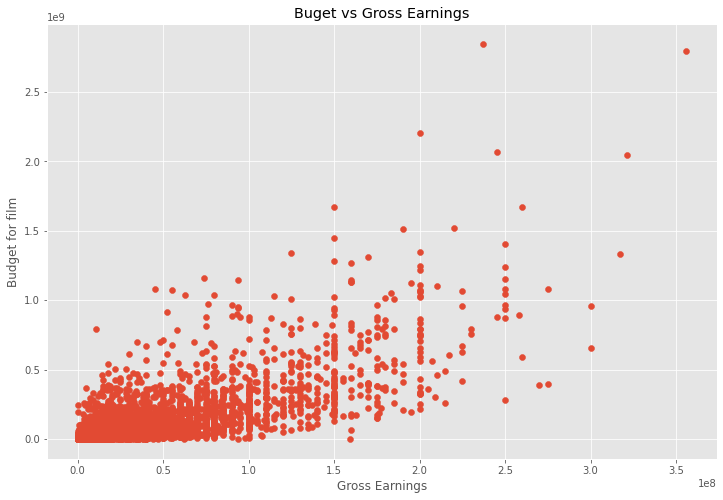

In [32]:
# Scatter plot comparing budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Buget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

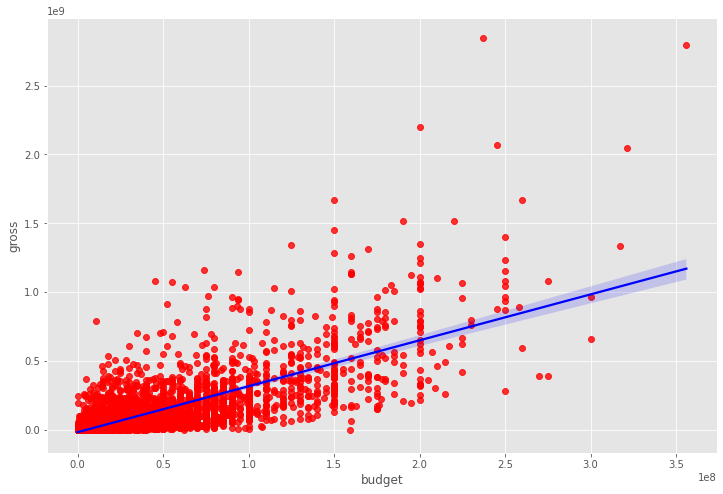

In [33]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

&nbsp;


### 2. Displaying correlation heatmap with numerical data 

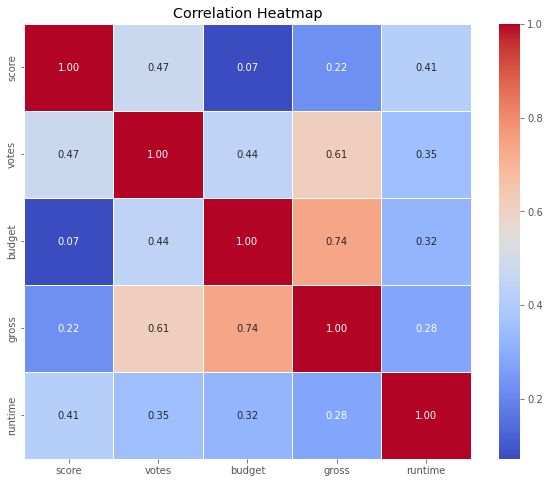

In [36]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


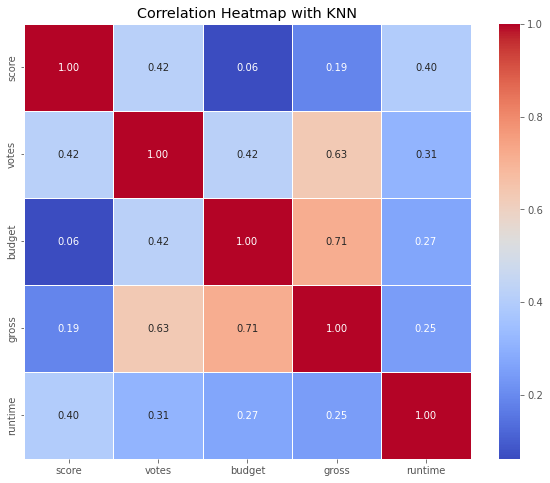

In [37]:
correlation_matrix_KNN = df_KNN.corr()

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix_KNN, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with KNN")
plt.show()

&nbsp;


### 3. Transforming Object Data Types

In [38]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
        
df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4690,6,6,11,1304,8.4,927000.0,1795,2832,698,46,19000000,46998772,1426,146.0
1,3927,6,1,11,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3640,4,0,11,1359,8.7,1200000.0,757,1818,1156,47,18000000,538375067,945,124.0
3,204,4,4,11,1127,7.7,221000.0,889,1413,1473,47,3500000,83453539,1108,88.0
4,732,6,4,11,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0


In [39]:
df_numerized_KNN = df_KNN.copy()

for col_name in df_numerized.columns:
    if(df_numerized_KNN[col_name].dtype=='object'):
        df_numerized_KNN[col_name]= df_numerized_KNN[col_name].astype('category')
        df_numerized_KNN[col_name]= df_numerized_KNN[col_name].cat.codes
        
df_numerized_KNN.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6368,6,6,11,1653,8.4,927000.0,2471,3850,977,52,19000000,46998772,2178,146.0
1,5370,6,1,11,1445,5.8,65000.0,2169,1563,305,53,4500000,58853106,686,104.0
2,4954,4,0,11,1717,8.7,1200000.0,1063,2463,1639,53,18000000,538375067,1446,124.0
3,277,4,4,11,1445,7.7,221000.0,1248,1919,2109,53,3500000,83453539,1697,88.0
4,993,6,4,11,1494,7.3,108000.0,1010,499,386,53,6000000,39846344,1665,98.0


In [40]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


&nbsp;


### 4. Visualizing the transformed data in Correlations heatmaps  


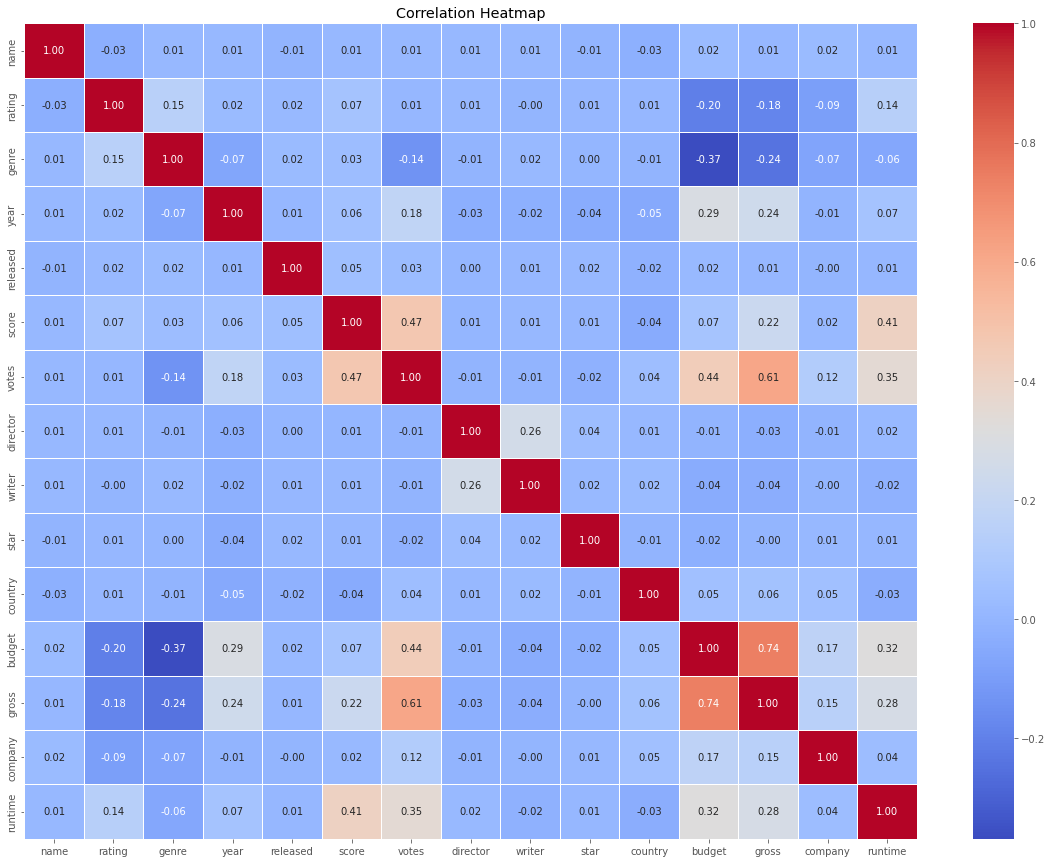

In [41]:
correlation_matrix =df_numerized.corr()

plt.figure(figsize=(20, 15))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


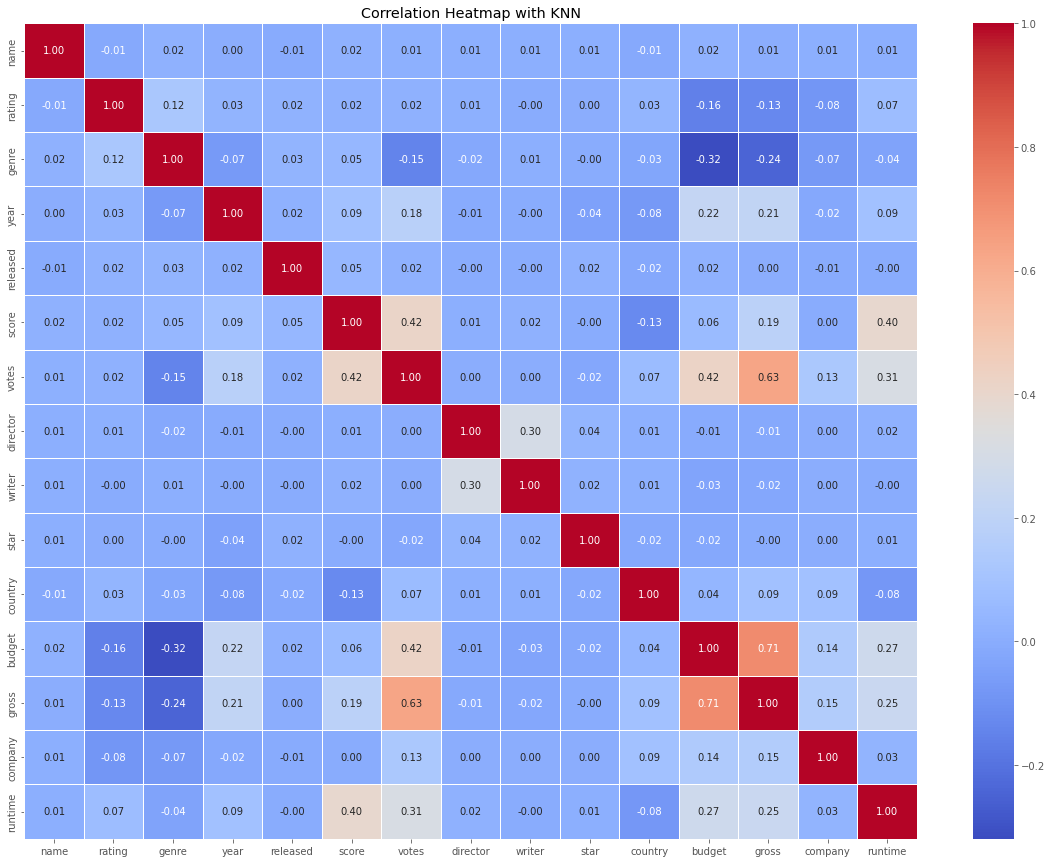

In [42]:
correlation_matrix_KNN =df_numerized_KNN.corr()

plt.figure(figsize=(20, 15))  # Set the figure size
sns.heatmap(correlation_matrix_KNN, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with KNN")
plt.show()


&nbsp;

### 5. Identifying Significant Correlations

In [43]:
correlation_mat= df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.029246
      genre       0.011012
      year        0.014776
      released   -0.006244
dtype: float64

In [44]:
correlation_mat_KNN= df_numerized_KNN.corr()
corr_pairs_KNN = correlation_mat_KNN.unstack()
corr_pairs_KNN.head()

name  name        1.000000
      rating     -0.010442
      genre       0.018116
      year        0.002945
      released   -0.010226
dtype: float64

In [45]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs_KNN = corr_pairs_KNN.sort_values()
sorted_pairs.head()

genre   budget   -0.368860
budget  genre    -0.368860
genre   gross    -0.244420
gross   genre    -0.244420
rating  budget   -0.203858
dtype: float64

In [46]:
# Highest correlation over 0.5 and under 1
filtered_pairs = sorted_pairs[(sorted_pairs > 0.50) & (sorted_pairs < 1.0)]
filtered_pairs

votes   gross     0.614717
gross   votes     0.614717
        budget    0.740243
budget  gross     0.740243
dtype: float64

In [47]:
# Highest correlation over 0.5 and under 1
filtered_pairs_KNN = sorted_pairs_KNN[(sorted_pairs_KNN > 0.50) & (sorted_pairs_KNN < 1.0)]
filtered_pairs_KNN

votes   gross     0.631084
gross   votes     0.631084
        budget    0.714627
budget  gross     0.714627
dtype: float64

In [48]:
sorted_pairs.head()

genre   budget   -0.368860
budget  genre    -0.368860
genre   gross    -0.244420
gross   genre    -0.244420
rating  budget   -0.203858
dtype: float64

In [49]:
sorted_pairs_KNN.head()

budget  genre    -0.319483
genre   budget   -0.319483
        gross    -0.242753
gross   genre    -0.242753
rating  budget   -0.158198
dtype: float64

&nbsp;

## Results


Votes and budget have the highest correlation with gross. These correlations suggest that there is a positive relationship between the success of a movie (measured by its gross revenue) and both the number of votes it receives and its production budget. Specifically, movies tend to earn more if they have more votes or if they were produced with a higher budget. These insights can be valuable for studios and investors in the film industry, as they provide an understanding of the factors that contribute to a movie's financial success.